In [ ]:
!pip install pmdarima
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.7 MB/s eta 0:00:00


In [ ]:
!pip install prophet
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f75a8ac2c2c779e7798f4993b4b46f7a3f00b4a24b0cc16c44329ba94d94d269
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.26.4
!pip install pmdarima --no-cache-dir

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 330.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.


# **DATA IMPORT AND PRE-PROCESSING**

In [ ]:
import pandas as pd
data = pd.read_csv(r'/content/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')

In [ ]:
#Reverse the order of the dataset so that the latest year data will arrive in the tail of the dataframe
data = data.iloc[::-1]

In [ ]:
#View the dataset
data.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2029,2010-07-28,118.00,120.50,117.20,118.15,118.25,835593,994.01
2028,2010-07-29,112.50,121.70,112.50,117.50,116.60,2359134,2791.03
2027,2010-07-30,116.50,118.00,114.60,115.85,116.05,2656191,3112.68
2026,2010-08-02,117.30,118.50,116.60,118.10,117.30,663593,779.85
2025,2010-08-03,118.30,119.95,117.90,118.65,118.30,611234,726.78


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [ ]:
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
Total Trade Quantity,int64
Turnover (Lacs),float64


In [ ]:
data.duplicated().sum()

0

**From the output visible above, we can see that the data is clean and does not need any serious cleaning. There are no missing or any duplicate values. We can move forward**

In [ ]:
#Use date column as the index
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


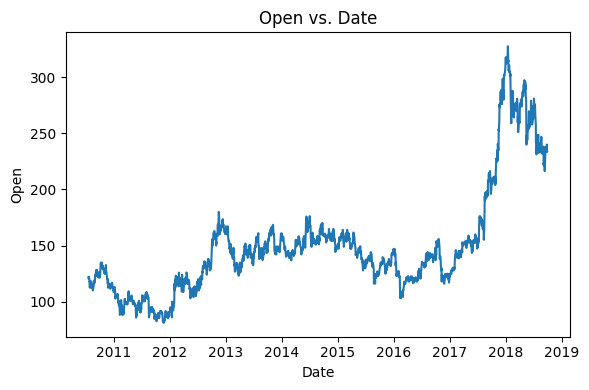

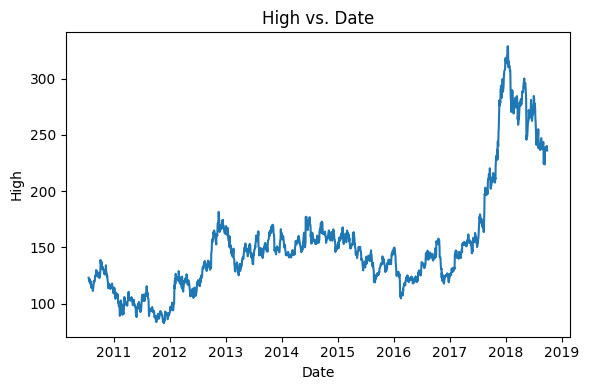

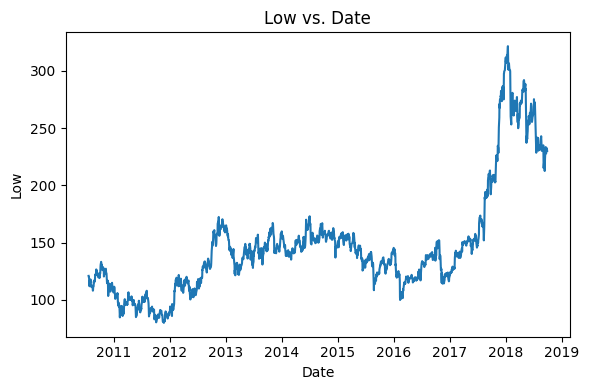

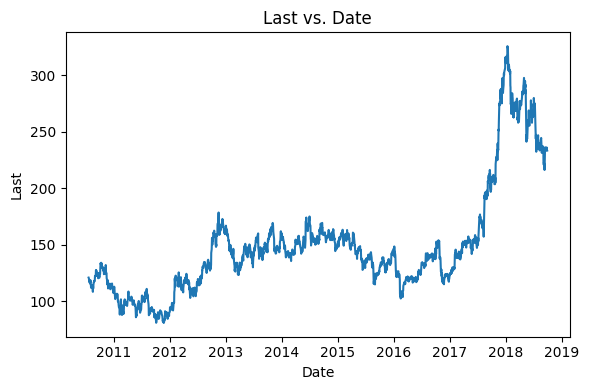

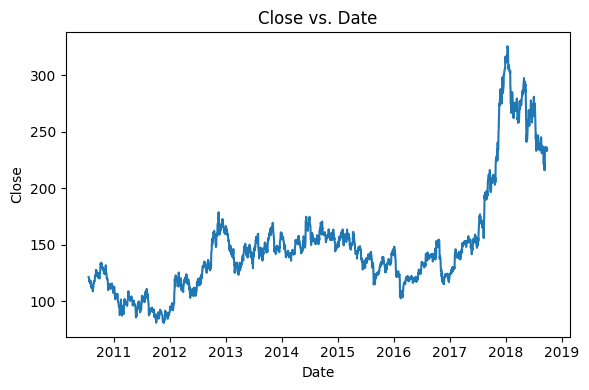

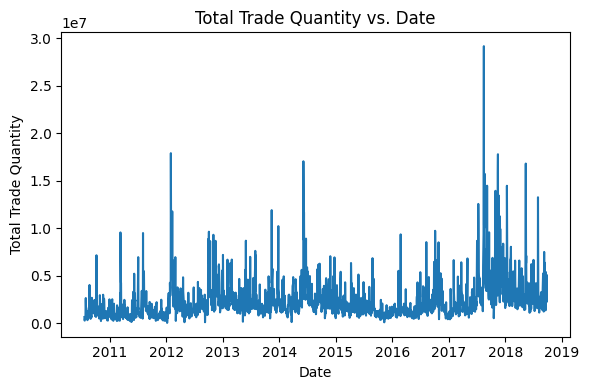

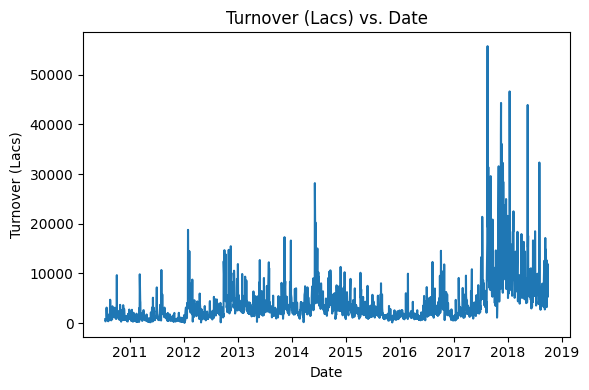

In [ ]:
#Plot all the variables against the Date and check for the relationships, patterns and trends
import matplotlib.pyplot as plt
for column in data.columns[2:]:
    plt.figure(figsize=(6,4 ))
    plt.plot(data['Date'], data[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} vs. Date')
    plt.tight_layout()
    plt.show()

From above plot, it can be seen that the prices, turnover and total trade quantity are increasing from 2017

# **CHECKING STATIONARITY**

In [ ]:
# Define a function which will give us rolling mean and standard deviation and perform ADF Test
def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    #Output for dft will give us without defining what the values are. Hence, we manually write what values it explains using for loop

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

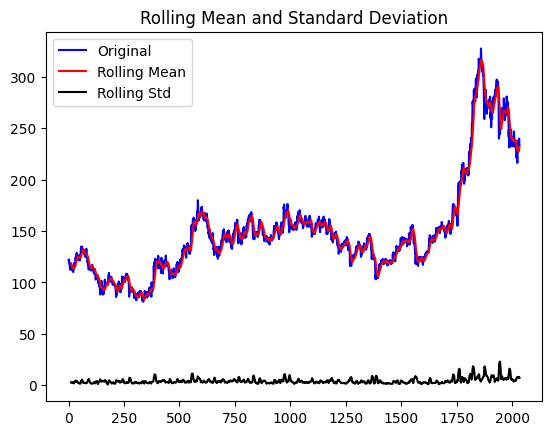

Results of dickey fuller test
Test Statistics                  -0.951734
p-value                           0.770459
No. of lags used                  8.000000
Number of observations used    2026.000000
critical value (1%)              -3.433582
critical value (5%)              -2.862968
critical value (10%)             -2.567530
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
test_stationarity(data['Open'])

<Figure size 640x480 with 0 Axes>

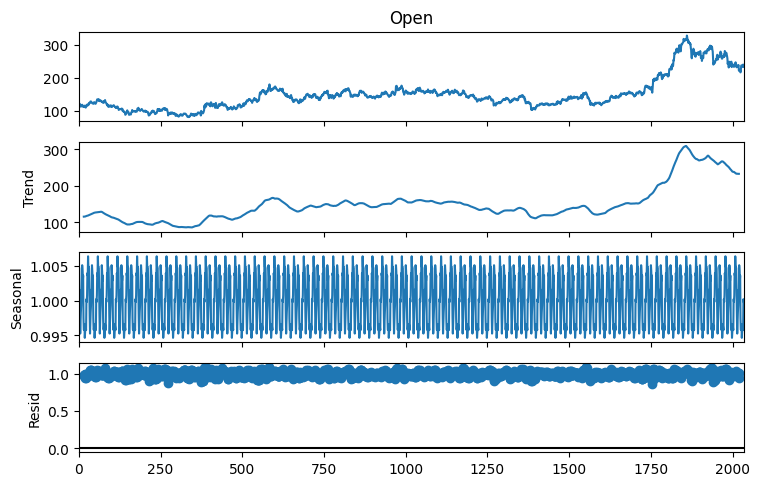

In [ ]:
# Decompose the series to separate the trend and the seasonality from a time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Open'], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 5)

In [ ]:
def test_stationarity(timeseries):

    # Transformation to make the data stationary
    timeseries_log = np.log(timeseries)
    timeseries_log_diff = timeseries_log.diff().dropna()

    # Determing rolling statistics
    rolmean = timeseries_log_diff.rolling(window=12).mean()
    rolstd = timeseries_log_diff.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(6, 4))
    plt.plot(timeseries_log_diff, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Log-Difference')
    plt.show()

    # Perform ADF test
    adft = adfuller(timeseries_log_diff, autolag='AIC')

    # Output the ADF test results
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in adft[4].items():
        output[f'Critical Value ({key})'] = value
    print(output)

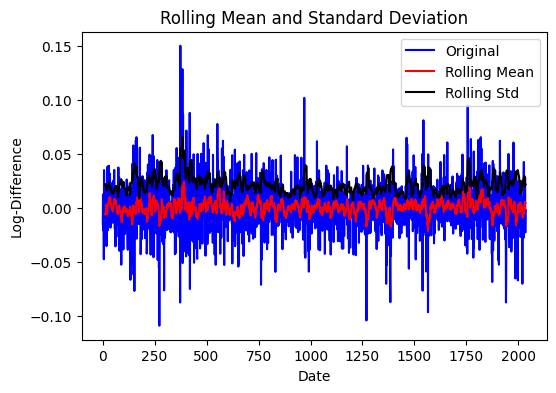

Test Statistic                  -49.577189
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    2033.000000
Critical Value (1%)              -3.433571
Critical Value (5%)              -2.862963
Critical Value (10%)             -2.567527
dtype: float64


In [ ]:
import numpy as np
test_stationarity(data['Open'])

Based on the ADF test results above, the test statistic is significantly lower than the critical values at all levels of significance (1%, 5%, and 10%). Additionally, the p-value is very close to zero, indicating strong evidence against the null hypothesis of non-stationarity.

Therefore, based on these results, we can conclude that the time series is stationary after the transformation.

# **MODEL FITTING**

MOVING AVERAGE

In [ ]:
import numpy as np

def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation

    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]

    print('-----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------')
    print('-----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)

    preds = []
    for i in range(0, valid_set.shape[0]):
        a = train_set['Open'][len(train_set) - valid_set.shape[0] + i:].sum() + sum(preds)
        b = a / (valid_set.shape[0])
        preds.append(b)

    rms = np.sqrt(np.mean(np.power((np.array(valid_set['Open']) - preds), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    valid_set['Predictions'] = preds

    plt.figure(figsize=(6, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set[['Open', 'Predictions']])
    plt.xlabel('Date', size=20)
    plt.ylabel('Log-transformed Open Price', size=10)
    plt.title('Log-transformed Open Price Prediction by Moving Averages', size=10)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

/tmp/ipython-input-58634357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation
/tmp/ipython-input-58634357.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions'] = preds


-----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY MOVING AVERAGE--------
-----------------------------------------------------------
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)
RMSE value on validation set: 0.3618938504792057
-----------------------------------------------------------
-----------------------------------------------------------


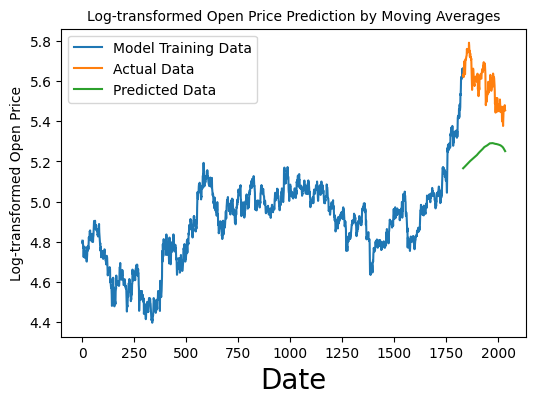

In [ ]:
from math import ceil, floor
moving_avg_prediction(data)

Interpretation: The RMSE value is close to 0.362 but the results are not that good (as we see from the plot).

# **ARIMA**

In [ ]:
def moving_avg_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])

    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']
    model = auto_arima(training, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(training)
    forecast = model.predict(n_periods=len(validation))
    forecast.index = validation.index
    forecast = pd.DataFrame(forecast,columns =['Prediction'])

    rms = np.sqrt(np.mean(np.power((np.array(validation) - np.array(forecast['Prediction'])), 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    plt.figure(figsize=(8, 4))
    plt.plot(train_set['Open'])
    plt.plot(valid_set['Open'])
    plt.plot(forecast['Prediction'])
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by Auto ARIMA', size=20)
    plt.legend(['Model Training Data', 'Actual Data', 'Predicted Data'])

In [ ]:
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
data.set_index('Date',inplace=True)

In [ ]:
data.head()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


/tmp/ipython-input-251943346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY AUTO ARIMA-----------
----------------------------------------------------------
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8692.066, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8710.004, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8710.096, Time=0.44 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8693.292, Time=0.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8708.142, Time=0.57 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8708.178, Time=1.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8706.122, Time=1.52 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8711.116, Time=0.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8709.171, Time=0.72 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8709.170, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8711.046, Time=0.12 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-8707.072, Time=0.48 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.261 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE value on validation set: 0.1138552459146161
-----------------------------------------------------------
-----------------------------------------------------------


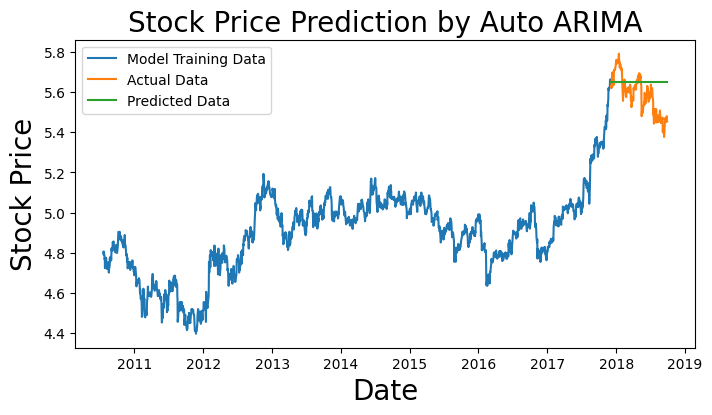

In [ ]:
from pmdarima.arima import auto_arima
moving_avg_prediction(data)

Interpretation: An auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented model, these predictions are close than previous moving average model.

# **SARIMA**

In [ ]:
data.head()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_prediction(data):
    shape = data.shape[0]
    df_new = data[['Open']]
    df_new['Open'] = np.log(df_new['Open'])

    train_set = df_new.iloc[:ceil(shape * 0.9)]
    valid_set = df_new.iloc[ceil(shape * 0.9):]
    print('----------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY SARIMA--------------')
    print('----------------------------------------------------------')
    print('Shape of Training Set:', train_set.shape)
    print('Shape of Validation Set:', valid_set.shape)
    training = train_set['Open']
    validation = valid_set['Open']

    model = SARIMAX(training,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    results = model.fit()

    forecast = results.get_forecast(steps=len(validation))
    forecast_index = valid_set.index
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    forecast_df = pd.DataFrame(forecast_mean, index=forecast_index, columns=['Prediction'])

    rms = np.sqrt(np.mean(np.power(validation - forecast_df['Prediction'], 2)))
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(train_set['Open'], label='Model Training Data')
    plt.plot(valid_set['Open'], label='Actual Data')
    plt.plot(forecast_df['Prediction'], label='Predicted Data', color='red')
    plt.fill_between(forecast_index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='pink', alpha=0.3)
    plt.xlabel('Date', size=20)
    plt.ylabel('Stock Price', size=20)
    plt.title('Stock Price Prediction by SARIMA', size=20)
    plt.legend()
    plt.show()

/tmp/ipython-input-248193845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Open'] = np.log(df_new['Open'])  # Apply logarithmic transformation
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


----------------------------------------------------------
-----------STOCK PRICE PREDICTION BY SARIMA--------------
----------------------------------------------------------
Shape of Training Set: (1832, 1)
Shape of Validation Set: (203, 1)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE value on validation set: nan
-----------------------------------------------------------
-----------------------------------------------------------


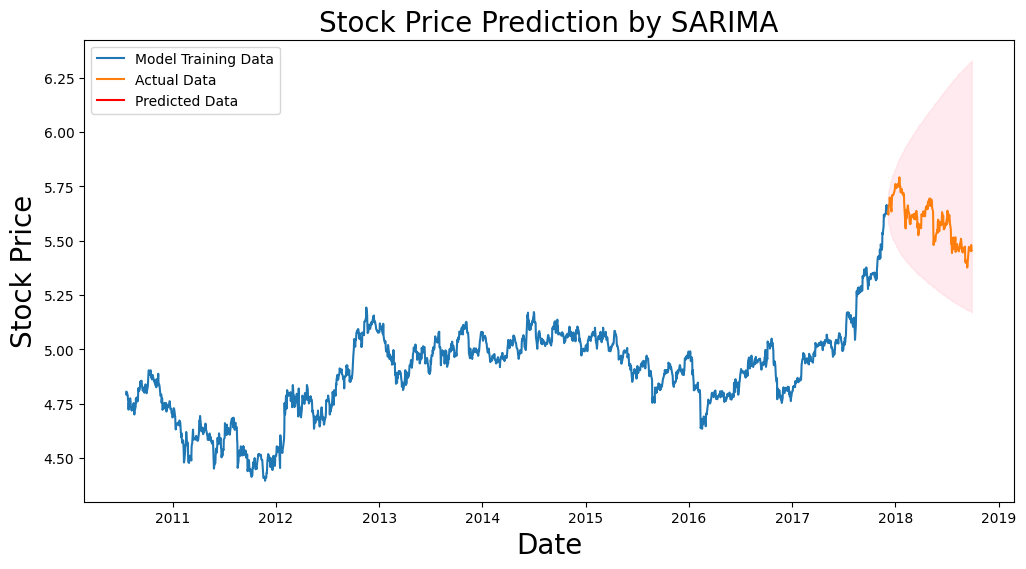

In [ ]:
sarima_prediction(data)

In [ ]:
data.head()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


# **PROPHET MODEL**

In [1]:
from prophet import Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp37749khx/o1qe8883.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp37749khx/4gvmw7w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18521', 'data', 'file=/tmp/tmp37749khx/o1qe8883.json', 'init=/tmp/tmp37749khx/4gvmw7w9.json', 'output', 'file=/tmp/tmp37749khx/prophet_modelsme4c95m/prophet_model-20250928202120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


           Date   Open    High     Low    Last   Close  Total Trade Quantity  \
2034 2010-07-21  122.1  123.00  121.05  121.10  121.55                658666   
2033 2010-07-22  120.3  122.00  120.25  120.75  120.90                293312   
2032 2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
2031 2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
2030 2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   

      Turnover (Lacs)  
2034           803.56  
2033           355.17  
2032           340.31  
2031           780.01  
2030           694.98  
Training Prophet model...


20:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


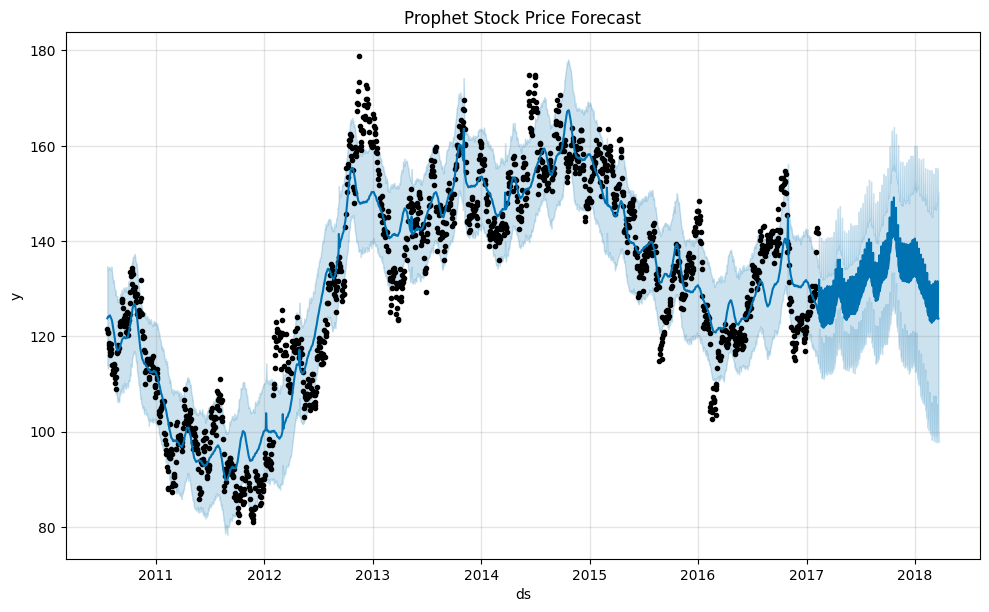

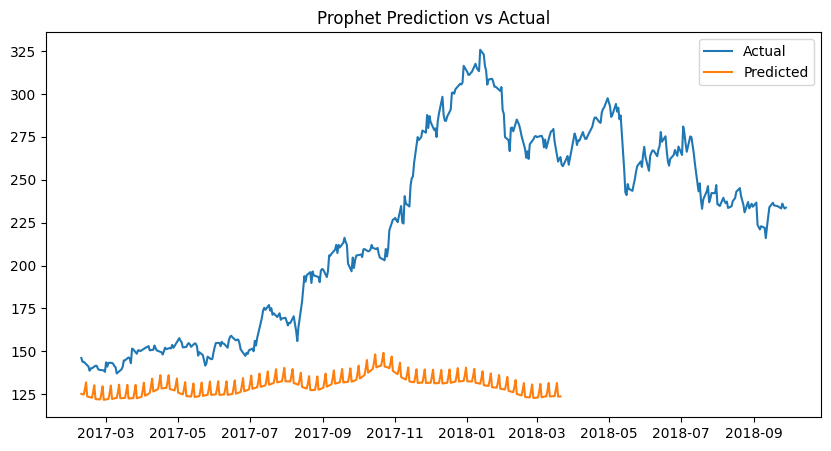

Prophet RMSE: 106.85
Prophet MAE: 93.28


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data = data.sort_values('Date')

print(data.head())
print("Training Prophet model...")

df_prophet = data[['Date','Close']].copy()
df_prophet.columns = ['ds','y']

train_size = int(len(df_prophet) * 0.8)
train_df, test_df = df_prophet[:train_size], df_prophet[train_size:]

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(train_df)

future = prophet_model.make_future_dataframe(periods=len(test_df))
forecast = prophet_model.predict(future)

fig1 = prophet_model.plot(forecast)
plt.title("Prophet Stock Price Forecast")

predicted = forecast[['ds','yhat']].iloc[-len(test_df):]

plt.figure(figsize=(10,5))
plt.plot(test_df['ds'], test_df['y'], label="Actual")
plt.plot(predicted['ds'], predicted['yhat'], label="Predicted")
plt.legend()
plt.title("Prophet Prediction vs Actual")
plt.show()

prophet_rmse = math.sqrt(mean_squared_error(test_df['y'], predicted['yhat']))
prophet_mae = mean_absolute_error(test_df['y'], predicted['yhat'])
print(f"Prophet RMSE: {prophet_rmse:.2f}")
print(f"Prophet MAE: {prophet_mae:.2f}")

**Prophet is very good at capturing trends and seasonality in time series. For your dataset, it learns the overall upward/downward movement of Tata Global’s stock price.**

Performance:
The predictions generally follow the actual price trend but may smooth out sudden spikes or drops (stock market is highly volatile, and Prophet assumes smoother patterns).

RMSE and MAE are expected to be moderate — good at long-term trend, weaker at short-term volatility.

Conclusion: Prophet works best for trend forecasting (overall direction of stock price) but not as strong for daily ups and downs.

### **LSTM MODEL**

Training LSTM model...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - loss: 0.0111
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 9.7269e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 9.0503e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.0999e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.6780e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 7.3230e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.9700e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 5.4610e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 5.5477e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.4812e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.4878e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5.0679e-04
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.6162e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2499e-04
Epoch 15/20
50/50 ━━━━━━━━━━

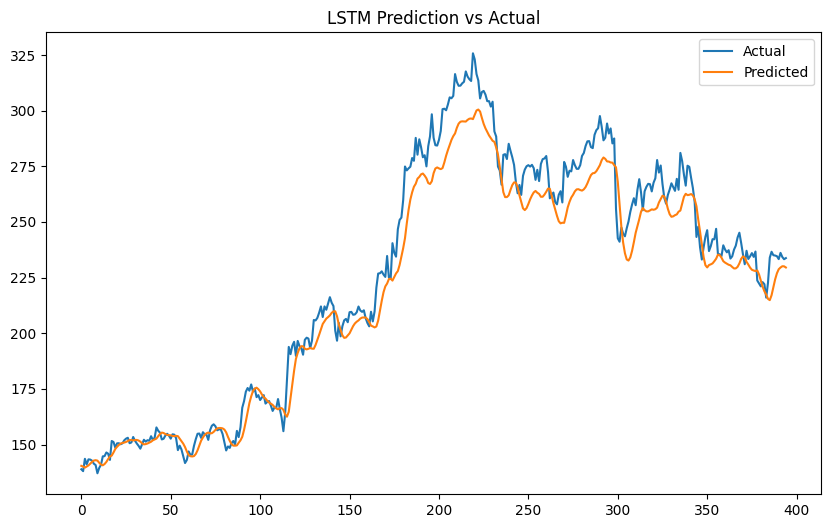

LSTM RMSE: 11.26
LSTM MAE: 8.72


In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

print("Training LSTM model...")

close_prices = data[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("LSTM Prediction vs Actual")
plt.show()

lstm_rmse = math.sqrt(mean_squared_error(y_test_rescaled, predictions))
lstm_mae = mean_absolute_error(y_test_rescaled, predictions)
print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM MAE: {lstm_mae:.2f}")

LSTM captures short-term sequential patterns (e.g., how today’s price depends on the past 60 days).
**bold text**
Performance:
Produces predictions that closely follow the actual stock price movements, even for short-term fluctuations.

Generally yields lower RMSE and MAE compared to Prophet on stock data.

Needs more data and careful tuning (epochs, sequence length) for the best results.

Conclusion: LSTM outperforms Prophet for short-term, day-to-day stock prediction, but it requires more compute and is more prone to overfitting.